In [1]:
format compact 

# I- Problème

Considérant un système dynamique défini par sa focntion de transfert en boucle ouverte suivante: 
$$ \mathbf{G(s)} = \frac{14}{(s+14)(s+2)(s+1.5)}  $$ 

La réponse en boucle fermée du notre système, ne doit pas dépasser le $16\%$ de la valeur finale. Le temps de réponse à $5\%$ ne doit pas dépasser le $0.3$ secondes, tout en garantissant une erreur statique nulle pour une excitation en échelon.

# II- Synthèse du correcteur et méthodologie

D'abord, on note que le système est stable en boucle ouvert puisque ses deux poles sont réels strictement négatifs. Cependant le gain statique de notre système est différent de $\mathbf{G(s)}=\frac{14}{42}=0.33 \neq 1$. D'où, la nécessité de synthétiser un correcteur comportant une action intégrale  pour garantir une erreur statique nulle en boucle fermée, tout en respectant les containtes sur le régime transitoire imposée par cette meme cahier de  charge. On choisit de synthétiser un correcteur Proportionnel-Intégrale-Dérivé (PID). D'où la forme de notre correcteur: 
$$C(s)=K_p(1+\frac{1}{T_is}+T_ds), K_p \gt 0, T_i \gt 0$$

On commence par traduire le cahier de charge en une focntion de transfert de seconde ordre traduisant le comportement souhaité du système en boucle fermée.

## II-1 Fonction du transfert souhaitée en boucle fermée.

### II-1-1 Calcul de la Fonction de transfert de réference

La fonction de transfert en boucle fermée, est alors choisie du 2éme ordre, en espérant que ses deux poles (conjuguées) seront les poles dominants. Cette fonction de transfert peut s'écrire sous cette forme:
$$\mathbf{{F_{ref}}(s)} = \frac{w_{n}^{2}}{s^2+2 \zeta w_n + w_{n}^{2}} $$
avec:
-  $\zeta$ est le coeficient d'amortissemnt. Généralemnt, $0 \lt \zeta \lt 1$ pour garantir que la réponse du système en boucle fermée est pseudo-oscillante ou oscillante-amortie.
- $w_n \gt 0$  est la pulsation naturelle du système. 

Dans ce cas le pair des poles conjuguées est donnée par:
$$ s_{1,2} = -\zeta w_n \pm j w_n \sqrt{1-\zeta^2}$$

Il est claire d'aprés la forme générale ( indépendament des valeurs de $\zeta$ et $w_n$) de notre fonction du transfert en boucle fermée que le gain statique vaut exactement $1$, c'ad $\mathbf{F(0)} = \frac{w_{n}^{2}}{ w_{n}^{2}} = 1 $, ce qui garantit une erreur statique nulle en poursuite d'une consigne échelon. Il reste à déterminer $\zeta$ et $w_n$ en fonction de dépassment et du temps de réponse imposés par le cahier de charge.

Rappelons quelques formules utiles pour un système du second ordre à réponse pseudo oscillante:

- le temps $t_p$du premier dépassemnt est donnée par $$t_p = \frac {\pi}{w_n \sqrt{1-\zeta^2}}$$
- $w_p$ pulsation du pseudo oscillation: $$w_p = w_n \sqrt{1-\zeta^2} $$ 
- $T_p$ pseudo_période, $$T_p=2t_p=\frac {2\pi}{w_n \sqrt{1-\zeta^2}}=\frac {2\pi}{w_p}$$
- $D_{\%}$ : premier dépassment en pourcentage,
$$D_{\%} = 100 \quad e^{\frac{-\pi \zeta}{\sqrt{1-\zeta^2}}}$$

La donnée du premier dépassemnt permet de calculer le coeffcient d'amortissemnt $\zeta$: dans notre cas un dépassemnt de $D=0.16$ correspond à un $\zeta=0.7$ (calcul approchée)

Il reste à déterminer $w_n$, on aura recours à l'abaque jointe donnant le temps de réponse réduit à $tr_{5\%}w_n$ en fonction du coefficient d'amortissemnt $\zeta$. La lecture de cette abaque, pour $\zeta=0.7
$ nous fournit la valeur $tr_{5\%}w_n=3$, et on déduit $w_n=\frac{3}{0.3}=10$ $\text{rad/s}$

notre focntion du transfert de réference est la suivante:
$$\mathbf{{F_{ref}}(s)} = \frac{100}{s^2+14 s+ 100} $$

Regardant maintenant comment on peut déterminer $K_p$ et $T_i$ en fonction des valeurs $\zeta$ et $w_n$

### II-1-2 Calcul de K_p, Td, T_i

Pour le calcul de ce deux inconnues, commençant par rearranger la fonction du transfert de notre correcteur:
    $$ \mathbf{C(s)} = K_pT_d\frac{s^2+\frac{1}{T_d}s+\frac{1}{T_dT_i}}{s}  $$ 

de la meme la fonction du transfert du système peut se mettre sous cette forme:
$$ \mathbf{G(s)} = \frac{14}{(s+14)(s^2+3.5s+3)}  $$ 

Et notre fonction du transfert en boucle fermée peut s'écrire maintenant:
$$ \mathbf{F(s)} = \frac{C(s)G(s)}{1+C(s)G(s)}  $$ 

soit en remplaçant,
$$ \mathbf{F(s)} = \frac{\frac{14K_pT_d(s^2+\frac{1}{T_d}s+\frac{1}{T_dT_i})}{s(s+14)(s^2+3.5s+3)}}{1+\frac{14K_pT_d(s^2+\frac{1}{T_d}s+\frac{1}{T_dT_i})}{s(s+14)(s^2+3.5s+3)}}  $$ 

on Choisit de compenser les deux poles $s_1=-2$ et $s_2=-1.5$ qui correspond à  ce qui équivaut à imposer $$s^2+\frac{1}{T_d}s+\frac{1}{T_dT_i}=s^2+3.5s+3$$

Aprés simplification, on obtien:
$$ \mathbf{F(s)} = \frac{14K_pT_d}{s^2+14s+14K_pT_d}  $$.

On peut aller plus loin en imposant, $\mathbf{F(s)} = \mathbf{{F_{ref}}(s)}$, et on déduit :

$$14K_pT_d=100$$

les deux équations $14$ et $16$, nous permettent de déduire les valeurs cherchées de $K_p=25$, $T_d=0.28$ et $T_i=1.67$

### II-1-3 Version finale de notre correcteur

Le synthèse de notre corretceur PID, n'est pas fini, en fait le correcteur PID sosu cette forme est irréalisable physiquement, puisque il n'est pas causale.
Une solution consite à filtrer l'action dérivée avec un filtre passe-bas. Ca consite à l'ajout d'un pole, dont en prends le soin qu'il soit négligeable par rapport aux poles de la fonction du transfert en bouvle fermée. La forme de notre correcteur aura cette forme:
$$\mathbf{C(s)}=K_p(1+\frac{1}{T_is}+\frac{T_ds}{1+\frac{T_ds}{N}})$$ 

Avec: $N$ une constante de Filtrage
Pour les simulatioons on fait le choix de $N=32$

# III- Simulations 
## III -1 En boucle Ouvert

In [2]:
g=tf([14],[1,17.5,52,42])


g =
 
              14
  --------------------------
  s^3 + 17.5 s^2 + 52 s + 42
 
Continuous-time transfer function.




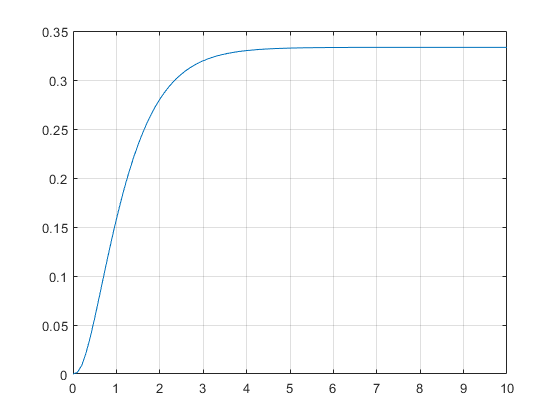

In [3]:
t=0:0.1:10;
y=step(g,t);
plot(t,y)
grid on

## III-1 En boucle fermée

la fonction Matlab $pidstd$ permet d'obtenir le correcteur avec les parametres calculées. 


In [4]:
PI = tf(pidstd(25,1.67,0.28,32)) 


PI =
 
  825 s^2 + 2872 s + 1711
  -----------------------
       s^2 + 114.3 s
 
Continuous-time transfer function.




la fonction minreal de matlab permet d'obtenir la simplification de la fonction du transfert (version minimale aprés simplification de zeros/poles). Elle n'est pas toujours efficace.

In [5]:
f1= minreal((PI*g)/(1+PI*g))


f1 =
 
                  11550 s^2 + 4.021e04 s + 2.395e04
  -----------------------------------------------------------------
  s^5 + 131.8 s^4 + 2052 s^3 + 1.753e04 s^2 + 4.501e04 s + 2.395e04
 
Continuous-time transfer function.




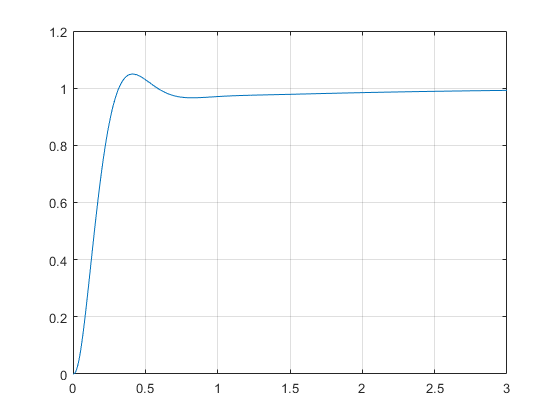

In [6]:
t=0:0.01:3;
y=step(f1,t);
plot(t,y)
grid on

In [7]:
S = stepinfo(f1,'SettlingTimeThreshold',0.05)

S = 
  struct with fields:

        RiseTime: 0.2017
    SettlingTime: 0.2836
     SettlingMin: 0.9106
     SettlingMax: 1.0495
       Overshoot: 4.9471
      Undershoot: 0
            Peak: 1.0495
        PeakTime: 0.4143



# IV- Conclusion

Avec un correcteur PID, on arrive à satisfaire le cahier de charge.